## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';', quotechar='"')

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.shape

(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
bank_target = df['y']
df['y'] = df['y'].map(lambda value: 1 if value == 'yes' else 0)
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
print(bank_client)

       age          job  marital            education  default housing loan
0       56    housemaid  married             basic.4y       no      no   no
1       57     services  married          high.school  unknown      no   no
2       37     services  married          high.school       no     yes   no
3       40       admin.  married             basic.6y       no      no   no
4       56     services  married          high.school       no      no  yes
...    ...          ...      ...                  ...      ...     ...  ...
41183   73      retired  married  professional.course       no     yes   no
41184   46  blue-collar  married  professional.course       no      no   no
41185   56      retired  married    university.degree       no     yes   no
41186   44   technician  married  professional.course       no      no   no
41187   74      retired  married  professional.course       no     yes   no

[41188 rows x 7 columns]


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [7]:
df['age'].max()

98

In [8]:
df['age'].min()

17

In [9]:
df['age'].isna().sum()

0

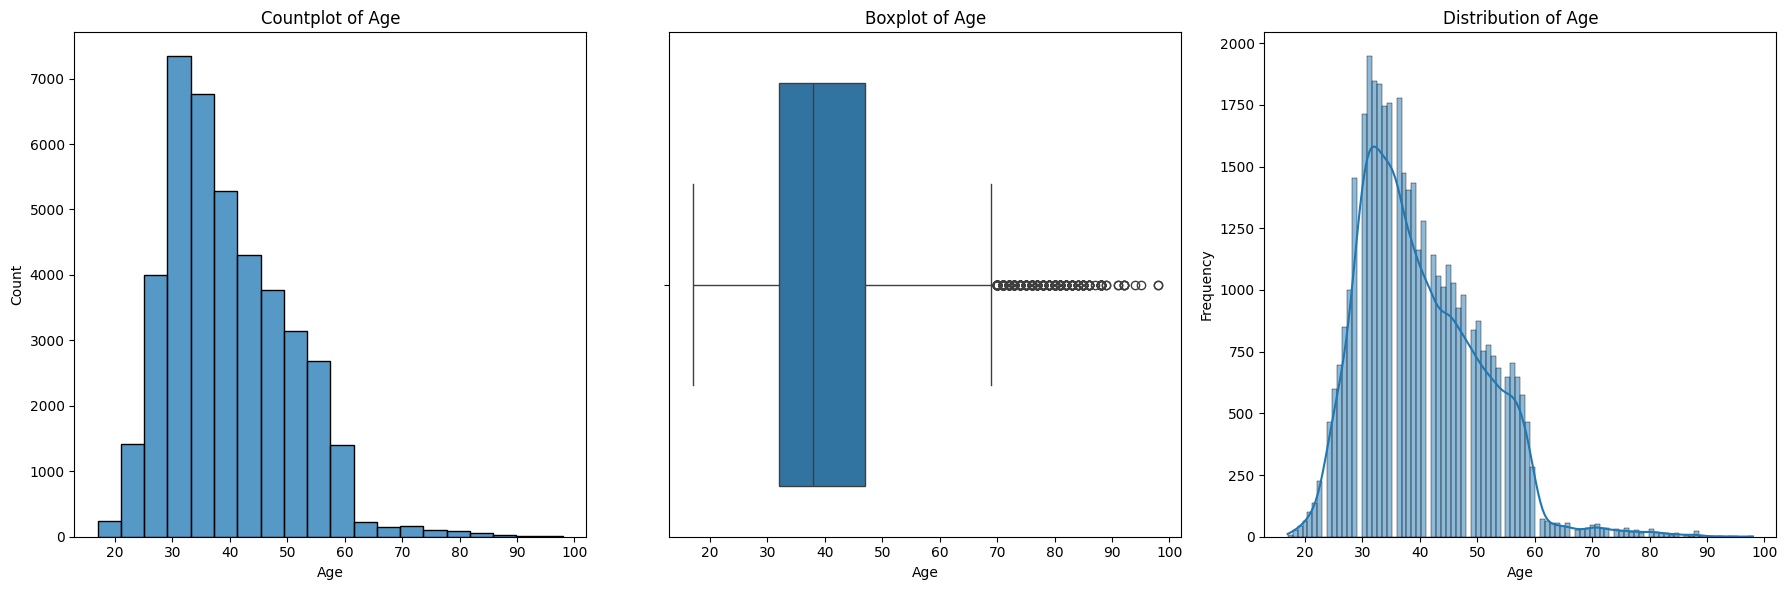

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
sns.histplot(df['age'], bins=20, kde=False)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)  
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(1, 3, 3) 
sns.histplot(df['age'], kde=True)  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. У даних не виявлено пропущених значень у стовпці age
2. Помітні викиди у старшому віці понад 70 років
3. Розподіл має правосторонню асиметрію та важкий хвіст праворуч. Важкий хвіст вказує, що наявні кілька даних старшого віку, що тягнуть розподіл праворуч, але вони не роблять окремий розділ (горку, пік) //не знаю як це назвати правильно.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [11]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = np.percentile(sorted_data, high_percentile-low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [12]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

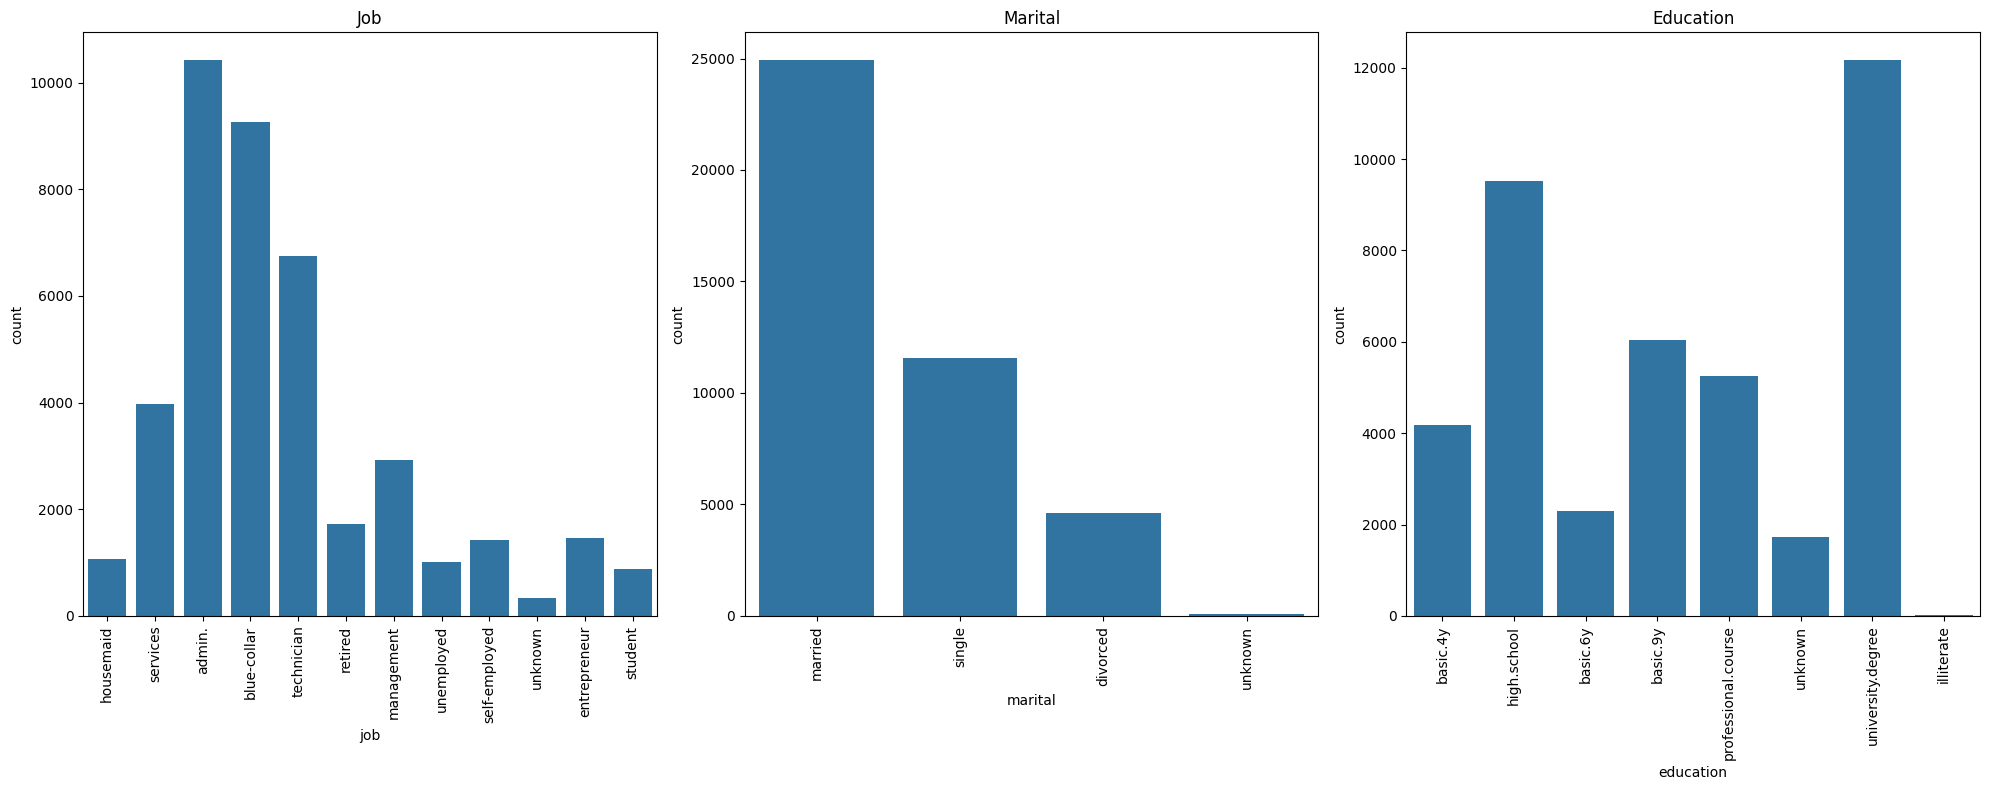

In [13]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='job')
plt.xticks(rotation=90)  
plt.title('Job')
plt.xlabel('job')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='marital')
plt.xticks(rotation=90)
plt.title('Marital')
plt.xlabel('marital')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='education')
plt.xticks(rotation=90)
plt.title('Education')
plt.xlabel('education')
plt.ylabel('count')

plt.tight_layout()
plt.show()


**Висновки з завдання 6 (детальні)**

1. Найпопулярніша робота admin. 
2. Категорії з дуже низькою частотою unknown, housemaid, student можуть викликати проблеми з генералізацією моделі.
3. Категорія married домінує створює певний дисбаланс класів 
4. Значення unknown трапляється рідко, отже дані повні
5. З графіку Еducation видно, що більша частина має вищу освіту. Середню освіту мають майже усі клієнти банку, окрім невідомих значень, та хто є неосвіченими, без освіти. 
6. Дані мають певні дисбаланси в розподілі освіти та зайнятості, які частково впливають на побудову моделей

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

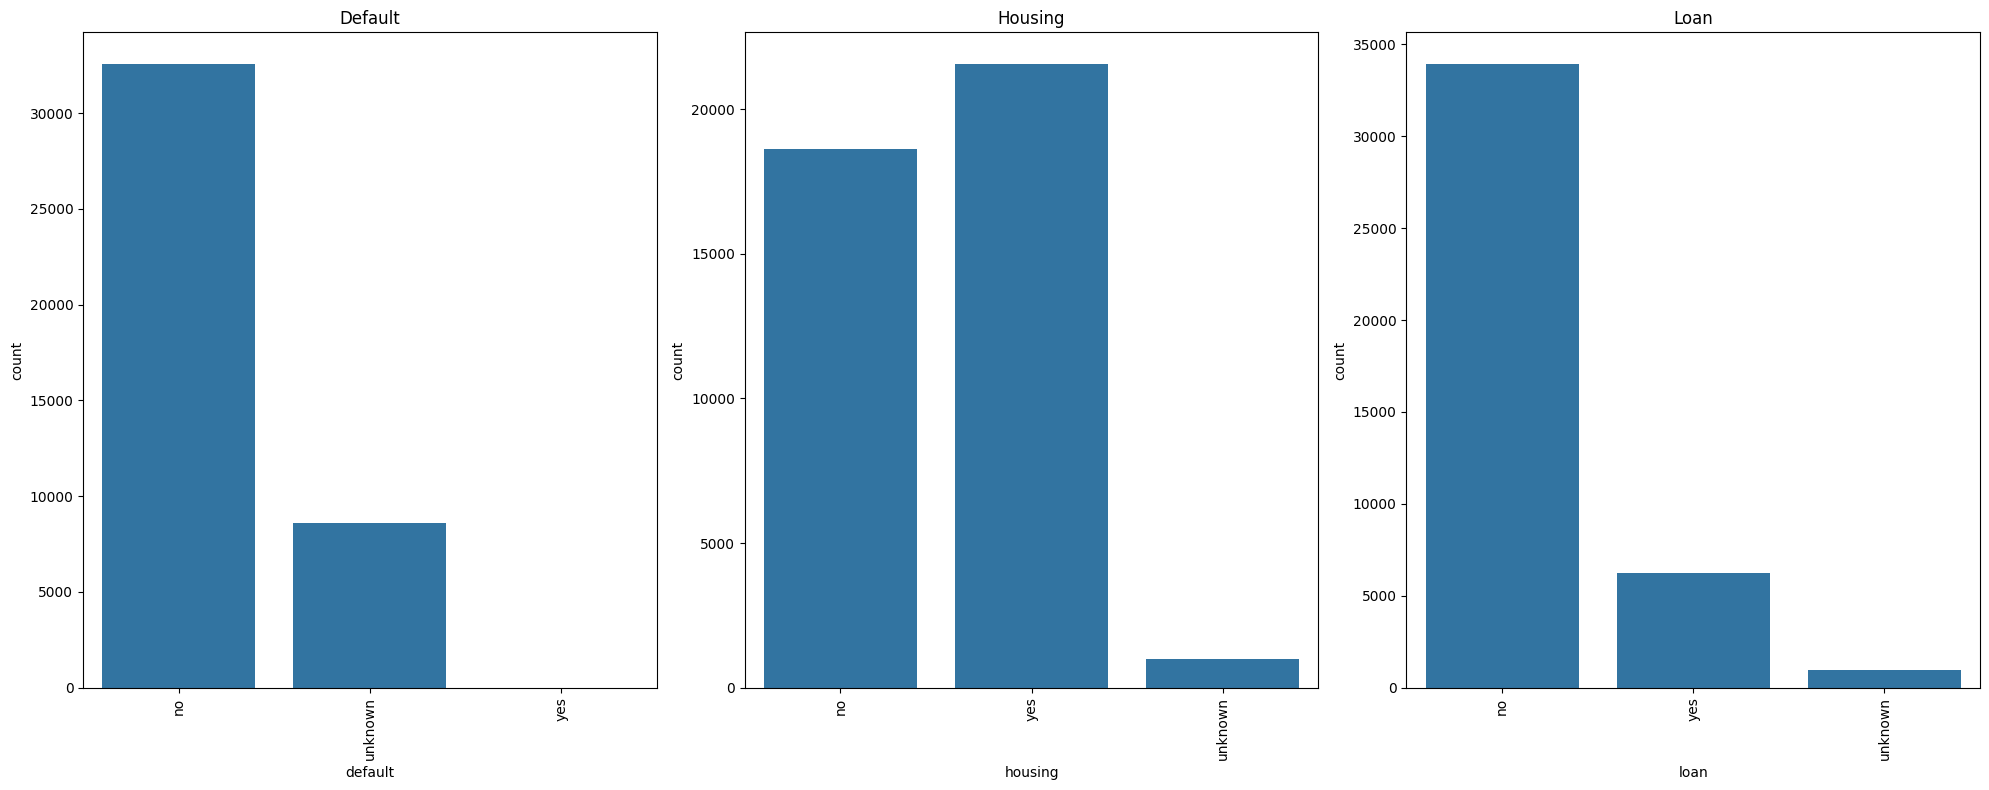

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='default')
plt.xticks(rotation=90)  
plt.title('Default')
plt.xlabel('default')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='housing')
plt.xticks(rotation=90)
plt.title('Housing')
plt.xlabel('housing')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='loan')
plt.xticks(rotation=90)
plt.title('Loan')
plt.xlabel('loan')
plt.ylabel('count')

plt.tight_layout()
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [15]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(df[col])
      
    return df

In [16]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

In [17]:
df_transform = encode_categorical_columns(df, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [18]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe['age_quartile'] = pd.qcut(dataframe[age_col], 4, labels=False)
  dataframe['age_quartile_labels'] = pd.qcut(dataframe[age_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
          
  return dataframe

In [19]:
bank_client = encode_age(bank_client, 'age')
dataset = encode_age(df, 'age')

In [20]:
print(bank_client[bank_client['age_quartile'] == 1])

       age  job  marital  education  default  housing  loan  age_quartile  \
2       37    7        1          3        0        2     0             1   
14      35    1        1          1        0        2     0             1   
16      35    1        1          1        0        2     0             1   
24      37    0        1          3        0        2     0             1   
25      35    9        1          6        0        0     2             1   
...    ...  ...      ...        ...      ...      ...   ...           ...   
41171   33    8        1          5        0        2     0             1   
41175   34    8        2          7        0        2     0             1   
41176   38    3        0          3        0        2     2             1   
41180   36    0        1          6        0        0     0             1   
41181   37    0        1          6        0        2     0             1   

      age_quartile_labels  
2                      Q2  
14                 

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [21]:
bank_relat =df[['contact', 'month', 'day_of_week', 'duration']]
for column in bank_relat:
    print(column, bank_relat[column].isna().sum())

contact 0
month 0
day_of_week 0
duration 0


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [22]:
unique_vulue = ['contact', 'month', 'day_of_week']
for i in unique_vulue:
    unique = bank_relat[i].unique()
    print(i, unique)

contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



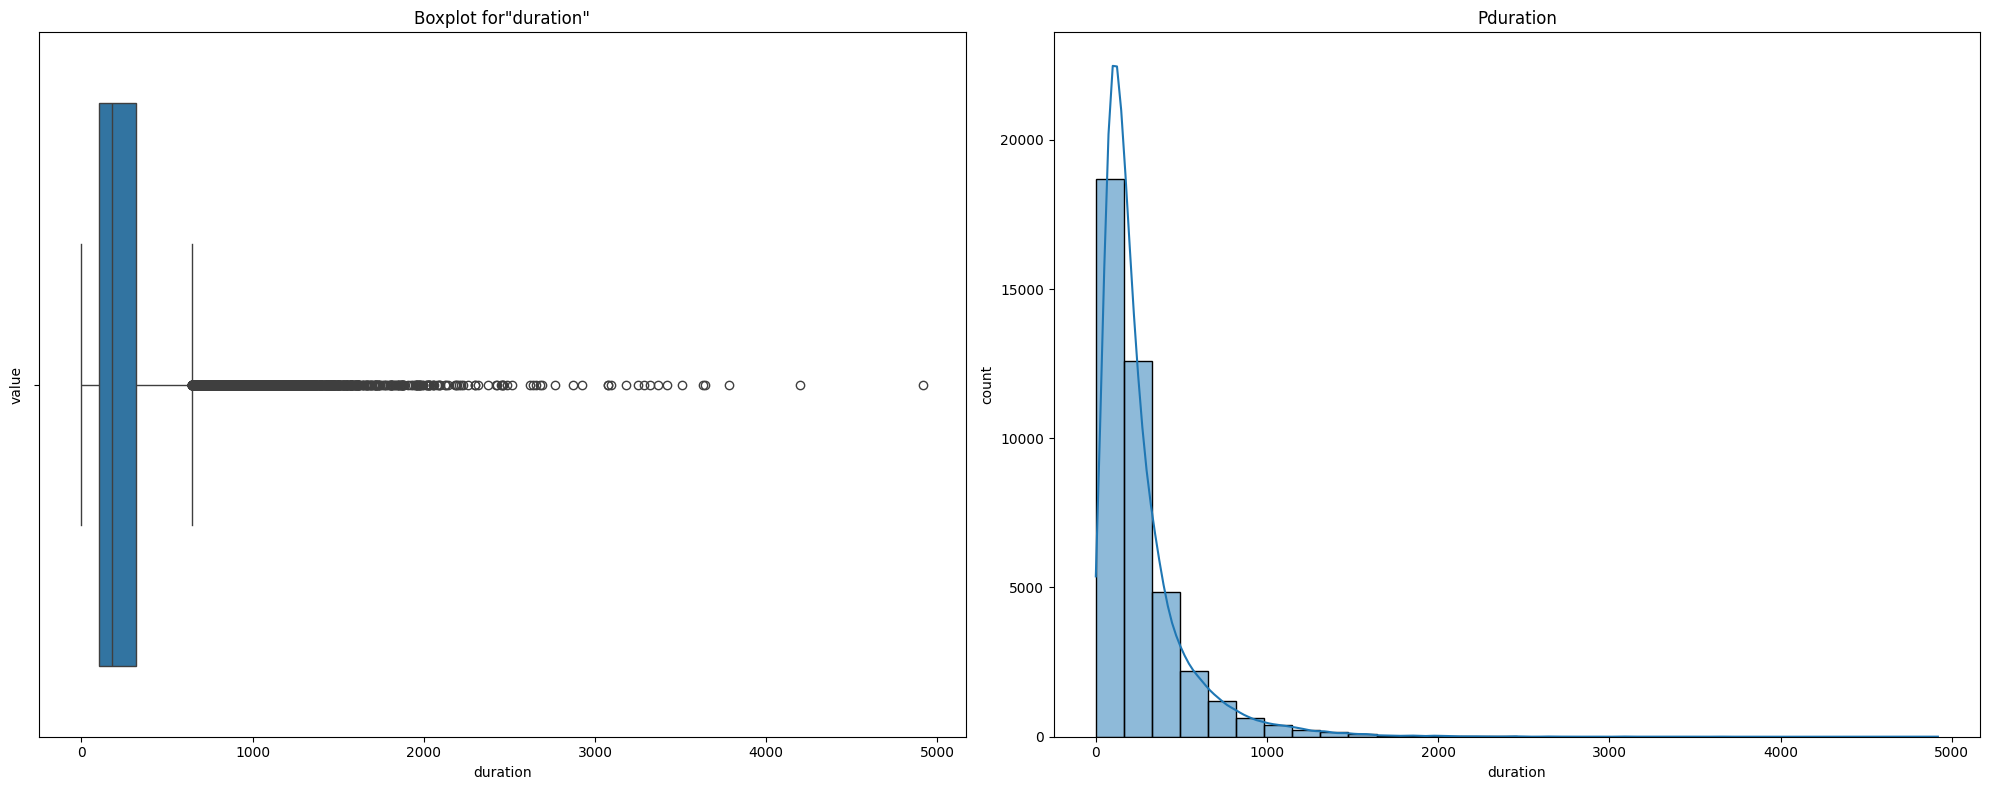

In [23]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=bank_relat, x='duration')
plt.title('Boxplot for"duration"')
plt.xlabel('duration')
plt.ylabel('value')

plt.subplot(1, 2, 2)
sns.histplot(bank_relat['duration'], kde=True, bins=30)
plt.title('Рduration')
plt.xlabel('duration')
plt.ylabel('count')

plt.tight_layout()
plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [24]:
Coder_value = encode_categorical_columns(df, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [25]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column

    df: pd.DataFrame to encode
    duration_col: duration col to encode 
    """

    dataframe['duration_quartile'] = pd.qcut(dataframe[duration_col], 4, labels=False)
    dataframe['duration_quartile_labels'] = pd.qcut(dataframe[duration_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    return dataframe

In [26]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [27]:
bank_socec = bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_socec)

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
...             ...             ...            ...        ...          ...
41183          -1.1          94.767          -50.8      1.028       4963.6
41184          -1.1          94.767          -50.8      1.028       4963.6
41185          -1.1          94.767          -50.8      1.028       4963.6
41186          -1.1          94.767          -50.8      1.028       4963.6
41187          -1.1          94.767          -50.8      1.028       4963.6

[41188 rows x 5 columns]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [28]:
bank_other =df[['campaign', 'pdays', 'previous', 'poutcome']]
print(bank_other)

       campaign  pdays  previous     poutcome
0             1    999         0  nonexistent
1             1    999         0  nonexistent
2             1    999         0  nonexistent
3             1    999         0  nonexistent
4             1    999         0  nonexistent
...         ...    ...       ...          ...
41183         1    999         0  nonexistent
41184         1    999         0  nonexistent
41185         2    999         0  nonexistent
41186         1    999         0  nonexistent
41187         3    999         1      failure

[41188 rows x 4 columns]


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [29]:
Coder_value  = encode_categorical_columns(df, ['poutcome'])
print(Coder_value)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  previous  poutcome  emp.va

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [30]:
bank_final = df[['contact', 'month', 'day_of_week', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_final)


       contact  month  day_of_week  age  job  marital  education  default  \
0            1      6            1   56    3        1          0        0   
1            1      6            1   57    7        1          3        1   
2            1      6            1   37    7        1          3        0   
3            1      6            1   40    0        1          1        0   
4            1      6            1   56    7        1          3        0   
...        ...    ...          ...  ...  ...      ...        ...      ...   
41183        0      7            0   73    5        1          5        0   
41184        0      7            0   46    1        1          5        0   
41185        0      7            0   56    5        1          6        0   
41186        0      7            0   44    9        1          5        0   
41187        0      7            0   74    5        1          5        0   

       housing  loan  campaign  pdays  previous  poutcome  emp.var.rate  \


**Завдання 19** Провести ділення вибірки

In [31]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [32]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [33]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

In [34]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [35]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7188   91]
 [ 754  205]]
90.0


## k-NN

k=1 85.05 (+/- 0.86)
k=2 89.07 (+/- 0.57)
k=3 88.48 (+/- 0.48)
k=4 89.48 (+/- 0.55)
k=5 89.37 (+/- 0.65)
k=6 89.67 (+/- 0.63)
k=7 89.68 (+/- 0.69)
k=8 89.78 (+/- 0.69)
k=9 89.77 (+/- 0.73)
k=10 89.83 (+/- 0.76)
k=11 89.80 (+/- 0.71)
k=12 89.95 (+/- 0.69)
k=13 89.84 (+/- 0.66)
k=14 89.94 (+/- 0.66)
k=15 89.89 (+/- 0.69)
k=16 89.93 (+/- 0.69)
k=17 89.91 (+/- 0.63)
k=18 89.92 (+/- 0.68)
k=19 89.88 (+/- 0.73)
k=20 89.92 (+/- 0.67)
k=21 89.90 (+/- 0.67)
k=22 89.90 (+/- 0.66)
k=23 89.95 (+/- 0.63)
k=24 89.93 (+/- 0.65)
k=25 89.94 (+/- 0.63)
The optimal number of neighbors is 22 with 90.0%


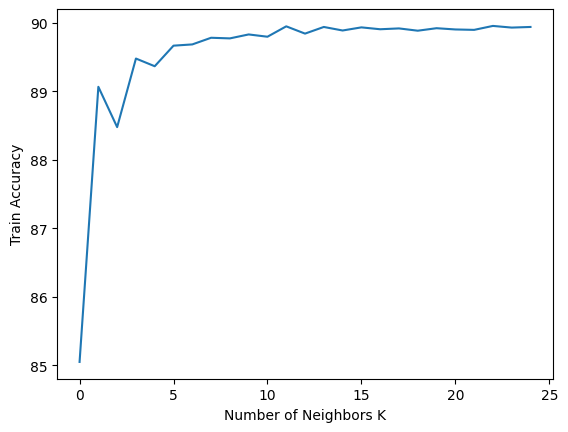

In [36]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7177  102]
 [ 751  208]]
90.0


## Логістична Регресія

In [38]:
models = pd.DataFrame({
                'Models':['LOGCV', 'KNN'],
                'Score': ['LOGCV', 'KNN']})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LOGCV,LOGCV
1,KNN,KNN


**Висновки по моделям (детальні)**

Обидві моделі показали порівняно високі та подібні результати, правляючись із задачами прогнозування на тренувальних даних.
в загальному, логістична регресія виявилась  швидшою у виконанні та легкою в інтерпретації, а KNN показула кращу точність, особіно після підбору оптимального значення параметра 
K = 22

